<a href="https://colab.research.google.com/github/ailab-nda/ML/blob/main/YOLOv5_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv5 による物体検出

**まず目を通して下さい** --> 物体検出の仕組みに関する解説：https://deepsquare.jp/2020/09/yolo/

## 環境構築
YOLOv5 のインストール（以下、ERROR が出ますが動きます。無視してOK）

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5/
!pip install -qr requirements.txt

## 素材の用意
- 写真：Teams に添付されている figure.jpgファイルを、左のファイルペインに置く（ドラッグ＆ドロップ）
- 動画の場合：Teams に添付されている movie.mp4ファイルを、左のファイルペインに置く

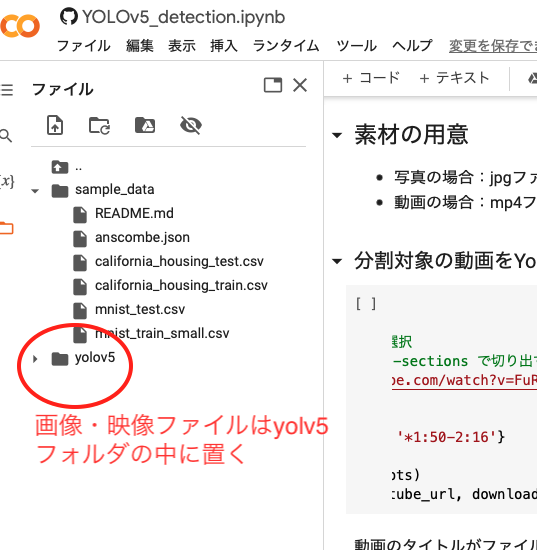

###写真の確認
figure.jpg をダブルクリック --> 右側ペインに表示

### 動画の確認
以下のコマンドを実行

In [ ]:
# mp4動画の再生
from IPython.display import HTML
from base64 import b64encode

mp4 = open('movie.mp4', 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width="50%" height="50%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

注：動画のタイトルがファイル名になるので、ファイル名を movie.mp4 に変更しておく。

# YOLO を実行

使い方：!python detect.py --source <写真/動画/リンク>

## 写真の場合
JPG ファイルを用意して、左のファイルペインに置いたら、以下のコマンドを実行。

In [ ]:
!python detect.py --source "figure.jpg"

結果は、上記の "Results saved to runs/detect/exp..." に保存されるので確認する。

### 検出の閾値の設定
閾値を下げると検出物体が増える。

In [ ]:
!python detect.py --source "figure.jpg" --conf 0.1 #conf でどこまで検出するかを設定可能

他のオプションについては、https://zenn.dev/gotty/articles/6bd35b25cf3bd9

## 動画の場合
mp4 ファイルを用意して、左のファイルペインに置いたら、以下のコマンドを実行。

In [ ]:
!python detect.py --source "movie.mp4"

結果が、runs/detect/exp... 以下に保存されるので、ダウンロードして確認。<br>
なお、ダウンロードはファイル名の右端に出る「：」アイコンをクリック --> ダウンロードを選択

## 演習
自分で用意した動画に対し物体検出を適用し、結果として得られた動画を添付して提出せよ。

In [ ]:
!pip install yt_dlp

#@title 分割対象の動画をYoutubeから選択
#@markdown 注: 長い場合は、download-sections で切り出す時間を指定する。
Youtube_url = "https://youtu.be/tShhVopoGKk"#@param {type:"string"}
import yt_dlp as youtube_dl
ydl_opts = {'format': 'best'}#,
            #'download-sections': '*1:50-2:16'}

ydl = youtube_dl.YoutubeDL(ydl_opts)
info_dict = ydl.extract_info(Youtube_url, download=True)

### 注：ダウンロードせずにリンクを直接指定する版
source オプションに動画の URL を設定する。再生時間が変わるので非推奨

In [ ]:
!python detect.py --source "https://youtu.be/tShhVopoGKk"